In [12]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import export_graphviz
import graphviz
import pydotplus
from IPython.display import Image
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np 
import matplotlib.pyplot as plt

# Step 1

In this step, I am replacing the numeric values 1 and 0 in the "survived" column with labels yes and no for better readability and interpretation. I am also selecting the numeric columns "age" and "fare" and calculating their mean values. I am filling any missing values in these columns with their respective mean values. For each column in the list of categorical features, I am calculating the mode and replacing missing values with the mode value. I am also converting categorical values in the "sex" and "pclass" columns to numeric values. I am creating a mapping dictionary, where "female" is mapped to 0, "male" is mapped to 1, and "1st," "2nd," and "3rd" classes are mapped to 1, 2, and 3, respectively. All of this is done to preprocess the data. Finally, the dataset is split into training and testing set with 80% of the data in the training set and 20% of the data in the testing set.

In [13]:
titanic = pd.read_csv("Titanic.csv")
titanic.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1st,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.337494,B5,Southampton,2,NaN,"St Louis, MO"
1,2,1st,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.550003,C22 C26,Southampton,11,NaN,"Montreal, PQ / Chesterville, ON"
2,3,1st,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,4,1st,0,"Allison, Mr. Hudson Joshua Crei",male,30.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,5,1st,0,"Allison, Mrs. Hudson J C (Bessi",female,25.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [14]:
titanic['survived'] = titanic['survived'].replace({1: 'yes', 0: 'no'})
# Select numeric columns for which you want to calculate and impute the mean
numeric_columns = ["age", "fare"]

# Calculate the mean for selected numeric columns
mean_values = titanic[numeric_columns].mean()

titanic[numeric_columns] = titanic[numeric_columns].fillna(mean_values)

# Select non-numeric/categorical columns for which you want to fill missing values
categorical_columns = ["name", "sex", "cabin", "embarked", "boat", "body", "home.dest"]

# Fill missing values in categorical columns with the mode
for column in categorical_columns:
    mode_value = titanic[column].mode()[0]  # Calculate the mode
    titanic[column] = titanic[column].fillna(mode_value)
    
titanic['sex'] = titanic['sex'].map( {'female': 0, 'male': 1} ).astype(int)
titanic['pclass'] = titanic['pclass'].map( {'1st': 1, '2nd': 2, '3rd': 3} ).astype(int)

In [15]:
# Split the entire dataset into training and testing sets (80% training, 20% testing)
train_data, test_data = train_test_split(titanic, test_size=0.2, random_state=42)

# Steps 2 and 3

In steps 2 and 3, I am training the MLPClassifier with 'pclass', 'sex', 'age', and 'sibsp' as independent variables, while 'survived' serves as the dependent variable. The goal is to evaluate the classifier's performance in terms of out-of-sample accuracy for both survivors and fatalities. This assessment is conducted for two distinct neural network architectures.

In the development of the first neural network classifier, I chose an architecture featuring two hidden layers, each populated with five neurons. This configuration was implemented using the MLPClassifier from scikit-learn, with key parameters such as the logistic activation function and the Adam solver for optimization. The regularization term, alpha, was set to 0.003 to mitigate overfitting, and a momentum of 0.9 was introduced. The initial learning rate, was configured at 0.01, reflecting a balance between convergence speed and stability. The maximum iteration limit was set to 5000 and a random state of 42 was specified.

Increasing the learning rate has a noticeable effect on the overall testing set accuracy. Specifically, when the initial learning rate is set to 0.005, the out-of-sample fatalities predicted hover around 89%. However, when the learning rate is increased to 0.01, the percent of correctly predicted fatalities jumps to around 96%. This suggests that a higher learning rate contributes to improved predictive accuracy, especially concerning fatal outcomes. Further increasing the learning rate seemed to decrease overall accuracy with respect to both training data and testing data, suggesting some underfitting due to potentially overshooting the minimum because of excessively large steps taken during optimization. When the learning rate was increased to 0.09 training data accuracy hovered around 76% and the testing data accuracy hovered around 76%. However, the out-of-sample accuracy for survivors increased from around 60% to around 77% and the out-of-sample accuracy for the fatalities decreased from around 90% to around 75%.

Decreasing the alpha parameter appears to be associated with a reduction in overfitting. Increasing the alpha seems to associated with an increase in overfitting because when alpha is increased, the strength of regularization is increased. Overfitting is decreased through constraint of weight size resulting in a decision boundary with less curvature. For instance, with an alpha of 0.003, the training data accuracy is approximately 82%, while the testing data accuracy is around 77%. In contrast, setting the alpha to 0.01 results in a training data accuracy of 82% but a lower testing data accuracy of 75%. The wider gap between training and testing accuracy for the higher alpha indicates increased overfitting. However, beyond an alpha of 0.003, there is no significant improvement in testing data accuracy, suggesting that an alpha in this range helps mitigate overfitting without compromising predictive performance.

Tuning the momentum parameter does not appear to have a discernible impact on model performance. The testing accuracy and overfitting remain relatively consistent across different momentum values. This suggests that the choice of momentum within the specified range may not significantly alter the model's predictive capabilities in this context. After final tuning, the out-of-sample accuracy for survivors hovered around 60% and the out-of-sample accuracy for fatalities hovered around 90%. 

In [16]:
#split dataset in features and target variable
feature_cols = ['pclass', 'sex', 'age', 'sibsp']
X_train = train_data[feature_cols] # Features
y_train = train_data.survived # Target variable

In [17]:
# Define the first neural network structure
nn_structure_1 = (5, 5)  # 5 neurons in the first hidden layer, 5 neurons in the second hidden layer

# Create an MLP Classifier
clf_1 = MLPClassifier(hidden_layer_sizes=nn_structure_1, activation='logistic', momentum=0.9, solver='adam', alpha=0.003, learning_rate_init=0.01, max_iter=5000, random_state=42)

# Fit the model to the training data
clf_1.fit(X_train, y_train)

y_train_pred_1 = clf_1.predict(X_train)
train_accuracy_1 = accuracy_score(y_train, y_train_pred_1)
print(f"Training dataset accuracy for neural network with 5 neurons in first hidden layer and 5 neurons in the second hidden layer: {train_accuracy_1 * 100:.2f}%")

Training dataset accuracy for neural network with 5 neurons in first hidden layer and 5 neurons in the second hidden layer: 82.33%


In [18]:
X_test = test_data[feature_cols]
y_test = test_data.survived
y_test_pred_1 = clf_1.predict(X_test)

test_accuracy_1 = accuracy_score(y_test, y_test_pred_1)
print(f"Testing dataset accuracy for neural network with 5 neurons in first hidden layer and 5 neurons in the second hidden layer: {test_accuracy_1 * 100:.2f}%")

# Calculate the accuracy for survivors and fatalities
num_survivors = sum(y_test == 'yes')
num_fatalities = sum(y_test == 'no')

correct_survivors_1 = sum((y_test == 'yes') & (y_test_pred_1 == 'yes'))
correct_fatalities_1 = sum((y_test == 'no') & (y_test_pred_1 == 'no'))

accuracy_survivors_1 = correct_survivors_1 / num_survivors
accuracy_fatalities_1 = correct_fatalities_1 / num_fatalities

print(f"Out-of-sample survivors accuracy for neural network with 5 neurons in first hidden layer and 5 neurons in the second hidden layer: {accuracy_survivors_1 * 100:.2f}%")
print(f"Out-of-sample fatalities accuracy for neural network with with 5 neurons in first hidden layer and 5 neurons in the second hidden layer: {accuracy_fatalities_1 * 100:.2f}%")

Testing dataset accuracy for neural network with 5 neurons in first hidden layer and 5 neurons in the second hidden layer: 77.10%
Out-of-sample survivors accuracy for neural network with 5 neurons in first hidden layer and 5 neurons in the second hidden layer: 60.17%
Out-of-sample fatalities accuracy for neural network with with 5 neurons in first hidden layer and 5 neurons in the second hidden layer: 90.97%


In designing the second neural network, I initially tried increasing the neuron count to 60 in each hidden layer showed a notable improvement in out-of-sample accuracy for fatalities, reaching approximately 98% correct predictions. However, it led to a decline in correctly predicted survivors, dropping to around 47%. This adjustment also resulted in a decrease in overall accuracy, with training data accuracy hovering at 81% and test data accuracy at 76%. 

To optimize overall accuracy, below I designed a neural network with 125 neurons in the first hidden layer and 100 neurons in the second hidden layer. A careful selection of hyperparameters, including an alpha parameter of 0.001 and a learning rate of 0.01, yielded the best results. This configuration achieved an overall training data accuracy of about 81% and a testing data accuracy of around 78%. Out-of-sample survivor accuracy reached approximately 68%, while out-of-sample fatality accuracy was around 87%.

Fine-tuning the alpha parameter further showed that decreasing it resulted in diminished out-of-sample and testing accuracy, while increasing it led to a drop in overall testing data accuracy to approximately 75%. Specifically, a lower alpha caused out-of-sample survivor accuracy to decrease to 48%, while out-of-sample fatality accuracy increased to 97%. A learning rate of 0.01 proved optimal, as higher rates, such as 0.05, significantly decreased accuracy and increased overfitting (64% training data accuracy, 55% testing data accuracy). Conversely, a learning rate below 0.01 resulted in decreased accuracy, with an overall testing accuracy of only 76%.

In summary, as the number of neurons increased, overall testing data accuracy improved, accompanied by a decrease in out-of-sample fatality accuracy and an increase in out-of-sample survivor accuracy. However, achieving this balance required a careful adjustment of the alpha parameter.

In [19]:
# Define the second neural network structure
nn_structure_2 = (125, 100)  # 125 neurons in the first hidden layer, 120 neurons in the second hidden layer

# Create an MLP Classifier
clf_2 = MLPClassifier(hidden_layer_sizes=nn_structure_2, activation='logistic', solver='adam', momentum=0.9, alpha=0.001, learning_rate_init=0.01, max_iter=5000, random_state=42)

# Fit the model to the training data
clf_2.fit(X_train, y_train)

y_train_pred_2 = clf_2.predict(X_train)
train_accuracy_2 = accuracy_score(y_train, y_train_pred_2)
print(f"Training dataset accuracy for neural network with 125 neurons in first hidden layer and 100 neurons in the second hidden layer: {train_accuracy_2 * 100:.2f}%")

Training dataset accuracy for neural network with 125 neurons in first hidden layer and 100 neurons in the second hidden layer: 81.38%


In [20]:
X_test = test_data[feature_cols]
y_test = test_data.survived
y_test_pred_cli_2 = clf_2.predict(X_test)

test_accuracy_2 = accuracy_score(y_test, y_test_pred_cli_2)
print(f"Testing dataset accuracy for neural network with 125 neurons in first hidden layer and 100 neurons in the second hidden layer: {test_accuracy_2 * 100:.2f}%")

# Calculate the accuracy for survivors and fatalities
num_survivors = sum(y_test == 'yes')
num_fatalities = sum(y_test == 'no')

correct_survivors_2 = sum((y_test == 'yes') & (y_test_pred_cli_2 == 'yes'))
correct_fatalities_2 = sum((y_test == 'no') & (y_test_pred_cli_2 == 'no'))

accuracy_survivors_2 = correct_survivors_2 / num_survivors
accuracy_fatalities_2 = correct_fatalities_2 / num_fatalities

print(f"Out-of-sample survivor accuracy for neural network with 125 neurons in first hidden layer and 100 neurons in the second hidden layer: {accuracy_survivors_2 * 100:.2f}%")
print(f"Out-of-sample fatalities accuracy for neural network with 125 neurons in first hidden layer and 100 neurons in the second hidden layer: {accuracy_fatalities_2 * 100:.2f}%")

Testing dataset accuracy for neural network with 125 neurons in first hidden layer and 100 neurons in the second hidden layer: 78.24%
Out-of-sample survivor accuracy for neural network with 125 neurons in first hidden layer and 100 neurons in the second hidden layer: 67.80%
Out-of-sample fatalities accuracy for neural network with 125 neurons in first hidden layer and 100 neurons in the second hidden layer: 86.81%


# Step 4

In [21]:
# Define the Random Forest Classifier with n_estimators = 50 and max_leaf_nodes from the pruned tree
rf_clf = RandomForestClassifier(n_estimators=50, max_leaf_nodes=14, n_jobs=-1)

# Fit the Random Forest model on the training data
rf_clf.fit(X_train, y_train)

rf_y_pred_train = rf_clf.predict(X_train)

train_accuracy_rf = accuracy_score(y_train, rf_y_pred_train)

# Use the trained model to make predictions on the test set
rf_y_pred_test = rf_clf.predict(X_test)

test_accuracy_rf = accuracy_score(y_test, rf_y_pred_test)

print(f"Overall training dataset accuracy for random forest: {train_accuracy_rf * 100:.2f}%")
print(f"Overall testing dataset accuracy for random forest: {test_accuracy_rf * 100:.2f}%")

# Calculate the accuracy for survivors and fatalities
rf_correct_survivors = sum((y_test == 'yes') & (rf_y_pred_test == 'yes'))
rf_correct_fatalities = sum((y_test == 'no') & (rf_y_pred_test == 'no'))

rf_accuracy_survivors = rf_correct_survivors / num_survivors
rf_accuracy_fatalities = rf_correct_fatalities / num_fatalities

print(f"Out-of-sample survivors survivor accuracy for Random Forest: {rf_accuracy_survivors * 100:.2f}%")
print(f"Out-of-sample fatalities accuracy for Random Forest: {rf_accuracy_fatalities * 100:.2f}%")

Overall training dataset accuracy for random forest: 83.95%
Overall testing dataset accuracy for random forest: 76.34%
Out-of-sample survivors survivor accuracy for Random Forest: 59.32%
Out-of-sample fatalities accuracy for Random Forest: 90.28%


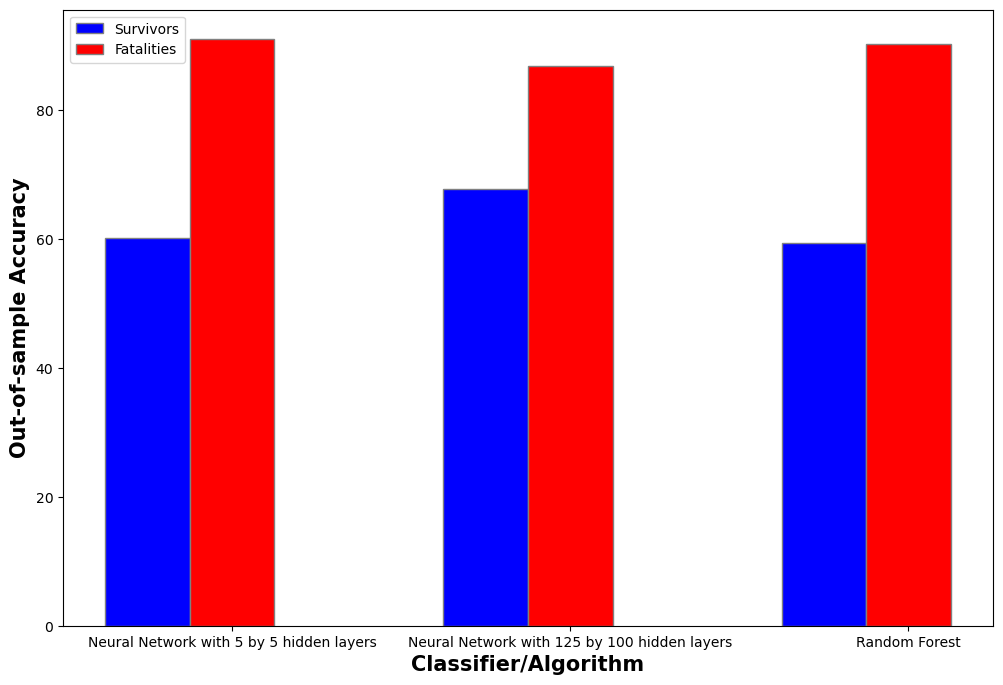

In [22]:
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8)) 
 
survivors = [accuracy_survivors_1 * 100, accuracy_survivors_2 * 100, rf_accuracy_survivors * 100] 
fatalities = [accuracy_fatalities_1 * 100, accuracy_fatalities_2 * 100, rf_accuracy_fatalities * 100]
 
bar1 = np.arange(len(survivors)) 
bar2 = [x + barWidth for x in bar1] 
bar3 = [x + barWidth for x in bar2] 
 
plt.bar(bar1, survivors, color ='b', width = barWidth, 
        edgecolor ='grey', label ='Survivors') 
plt.bar(bar2, fatalities, color ='r', width = barWidth, 
        edgecolor ='grey', label ='Fatalities')
 
plt.xlabel('Classifier/Algorithm', fontweight ='bold', fontsize = 15) 
plt.ylabel('Out-of-sample Accuracy', fontweight ='bold', fontsize = 15) 
plt.xticks([r + barWidth for r in range(len(survivors))], 
        ['Neural Network with 5 by 5 hidden layers', 'Neural Network with 125 by 100 hidden layers', 'Random Forest'])
 
plt.legend()
plt.show() 

The second neural network, characterized by a more complex architecture with 125 neurons in the first hidden layer and 100 neurons in the second hidden layer, demonstrated the highest overall testing data accuracy at ~78% and the least amount of overfitting. This improvement can be attributed to the network's increased capacity to capture intricate patterns and relationships within the data. The larger number of neurons allows the model to learn more complex representations, potentially enhancing its ability to generalize to unseen data.

On the other hand, the first neural network, with only 5 neurons in each hidden layer, achieved a slightly lower but still competitive testing data accuracy at ~77%. The choice of hyperparameters, including a learning rate of 0.01, alpha of 0.003, and momentum of 0.9, played a role in fine-tuning the model's performance. The regularization term alpha likely helped mitigate overfitting, contributing to a balance between capturing essential patterns and avoiding excessive complexity.

The random forest, while competitive, displayed a slightly lower overall testing data accuracy at ~76%. This model's tendency to overfit is evident from the notable discrepancy between its training data accuracy ~84% and testing data accuracy. The random forest's ensemble nature which allows it to aggregate predictions from multiple decision trees is a strength. However, the risk of overfitting increases if there are sparse features or if there are multiple strongly correlated variables in the data, which may very be the case with the Titanic dataset. Individual trees may become limited in their generalizability to new samples in these cases.

In terms of predicting survivors and fatalities, the second neural network outperformed both the first neural network and the random forest for out-of-sample survivors accuracy. This suggests that the increased model complexity and capacity of the second neural network allowed it to better capture the diverse patterns associated with survivor predictions.

However, when it comes to predicting fatalities specifically, both the first neural network and the random forest demonstrated high accuracy, with each achieving around 90%. The second neural network, while achieving a slightly lower accuracy for fatalities at ~87%, still performed competitively. 

In summary, the second neural network's superior performance in overall testing data accuracy can be attributed to its more complex architecture, featuring a higher number of neurons and careful hyperparameter tuning. The first neural network, with a simpler structure, proved effective as well. The random forest, despite its competitive performance, showed signs of overfitting.